In [61]:
import pandas as pd
import datetime as dt

elec_mean=pd.read_csv('C:/Users/SEOHO/Desktop/edata/elec_mean_data.csv')
print(elec_mean.head(3))

elec_max=pd.read_csv('C:/Users/SEOHO/Desktop/edata/elec_max_data.csv')
print(elec_max.head(3))

elec_med=pd.read_csv('C:/Users/SEOHO/Desktop/edata/elec_med_data.csv')
print(elec_med.head(3))

temp = pd.read_csv('C:/Users/SEOHO/Desktop/edata/temp.csv', encoding='cp949')
print(temp.head(3))

sunlight = pd.read_csv('C:/Users/SEOHO/Desktop/edata/sunlight.csv', encoding='cp949')
print(sunlight.head(3))

humidity = pd.read_csv('C:/Users/SEOHO/Desktop/edata/humidity.csv', encoding='cp949')
print(humidity.head(3))

precipitation = pd.read_csv('C:/Users/SEOHO/Desktop/edata/precipitaion.csv', encoding='cp949')
print(precipitation.head(3))
print(elec_mean.shape, temp.shape, sunlight.shape, humidity.shape, precipitation.shape)



cols = ['년도', '월', '일']
elec_mean['일시'] = elec_mean[cols].apply(lambda row: '-'.join(row.astype(str)), axis=1)
elec_mean['일시'] = pd.to_datetime(elec_mean['일시'], format='%Y-%m-%d')
elec_mean['일시'] = elec_mean['일시'].dt.date
elec_mean = elec_mean.drop(['년도','월','일'], axis=1)
elec_mean = elec_mean.rename(columns={'전력사용량':'(평균)전력사용량'})

elec_max['일시'] = elec_max[cols].apply(lambda row: '-'.join(row.astype(str)), axis=1)
elec_max['일시'] = pd.to_datetime(elec_max['일시'], format='%Y-%m-%d')
elec_max['일시'] = elec_max['일시'].dt.date
elec_max = elec_max.drop(['년도','월','일'], axis=1)
elec_max = elec_max.rename(columns={'전력사용량':'(최대)전력사용량'})

elec_med['일시'] = elec_med[cols].apply(lambda row: '-'.join(row.astype(str)), axis=1)
elec_med['일시'] = pd.to_datetime(elec_med['일시'], format='%Y-%m-%d')
elec_med['일시'] = elec_med['일시'].dt.date
elec_med = elec_med.drop(['년도','월','일'], axis=1)
elec_med = elec_med.rename(columns={'전력사용량':'(중앙값)전력사용량'})

temp=temp.drop(['지점번호','지점명','최고기온시각','최저기온시각'], axis=1)
temp['일시'] = pd.to_datetime(temp['일시'], format='%Y-%m-%d')
temp['일시'] = temp['일시'].dt.date


sunlight=sunlight.drop(['지점번호','지점명','일조율(%)'], axis=1)
sunlight['일시'] = pd.to_datetime(sunlight['일시'], format='%Y-%m-%d')
sunlight['일시'] = sunlight['일시'].dt.date

humidity=humidity.drop(['지점번호','지점명'], axis=1)
humidity['일시'] = pd.to_datetime(humidity['일시'], format='%Y-%m-%d')
humidity['일시'] = humidity['일시'].dt.date


precipitation=precipitation.drop(['지점번호','지점명','1시간최다강수량(mm)','1시간최다강수량시각'], axis=1)
precipitation['일시'] = pd.to_datetime(precipitation['일시'], format='%Y-%m-%d')
precipitation['일시'] = precipitation['일시'].dt.date




     년도  월  일     전력사용량
0  2017  1  1  9.648503
1  2017  1  2  7.352475
2  2017  1  3  5.082431
     년도  월  일   전력사용량
0  2017  1  1  31.174
1  2017  1  2  30.201
2  2017  1  3  17.176
     년도  월  일  전력사용량
0  2017  1  1  8.843
1  2017  1  2  6.482
2  2017  1  3  4.398
  지점번호 지점명          일시  평균기온(℃)  최고기온(℃) 최고기온시각  최저기온(℃) 최저기온시각
0  108  서울  2017-01-01      2.7      6.9  14:19     -1.6   5:40
1  108  서울  2017-01-02      5.0      9.2  13:55      1.8  23:55
2  108  서울  2017-01-03      2.0      7.7  14:44     -2.3   7:31
   지점번호 지점명          일시  일조합(hr)  일조율(%)  일사합(MJ/m2)
0   108  서울  2017-01-01      1.7    17.7        4.38
1   108  서울  2017-01-02      2.7    28.1        5.11
2   108  서울  2017-01-03      8.9    91.8        8.51
   지점번호 지점명          일시  평균습도(%rh)  최저습도(%rh)
0   108  서울  2017-01-01       75.9       59.0
1   108  서울  2017-01-02       77.8       57.0
2   108  서울  2017-01-03       61.8       38.0
   지점번호 지점명          일시  강수량(mm)  1시간최다강수량(mm) 1시간최다강수량시각
0   108  서울  2017-01-0

In [62]:
df = pd.merge(elec_mean, temp, on='일시', how='inner')
df = pd.merge(elec_max, df, on='일시', how='inner')
df = pd.merge(elec_med, df, on='일시', how='inner')
df = pd.merge(df, precipitation, on='일시', how='inner')
df = pd.merge(df, humidity, on='일시', how='inner')
df = pd.merge(df, sunlight, on='일시', how='inner')

print(df.head())
print(df.info())

df['강수량(mm)'] = df['강수량(mm)'].fillna(0)
df['일조합(hr)']=df['일조합(hr)'].fillna(0)
df['일사합(MJ/m2)']=df['일사합(MJ/m2)'].fillna(0)
df['최고기온(℃)'] = df['최고기온(℃)'].fillna(df['최고기온(℃)'].mean())
df['최저습도(%rh)'] = df['최저습도(%rh)'].fillna(df['최저습도(%rh)'].mean())
print(df.head())
print(df.info())
print(df.isnull().sum())

   (중앙값)전력사용량          일시  (최대)전력사용량  (평균)전력사용량  평균기온(℃)  최고기온(℃)  최저기온(℃)  \
0       8.843  2017-01-01     31.174   9.648503      2.7      6.9     -1.6   
1       6.482  2017-01-02     30.201   7.352475      5.0      9.2      1.8   
2       4.398  2017-01-03     17.176   5.082431      2.0      7.7     -2.3   
3       8.200  2017-01-04     35.117   9.081105      3.9      8.9      1.0   
4       8.325  2017-01-05     36.038   9.285105      3.8      7.3     -0.1   

   강수량(mm)  평균습도(%rh)  최저습도(%rh)  일조합(hr)  일사합(MJ/m2)  
0      NaN       75.9       59.0      1.7        4.38  
1      0.3       77.8       57.0      2.7        5.11  
2      NaN       61.8       38.0      8.9        8.51  
3      NaN       55.0       31.0      8.6        8.68  
4      NaN       52.3       42.0      0.0        4.27  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1822 entries, 0 to 1821
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   (

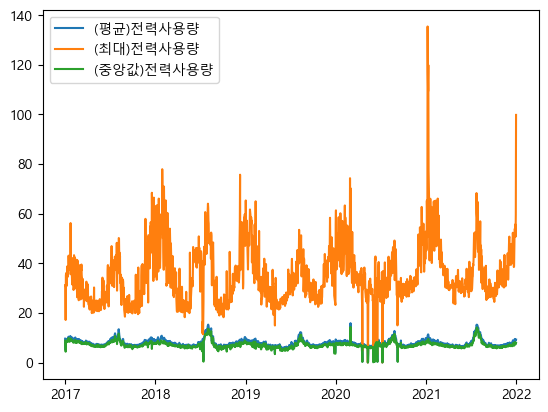

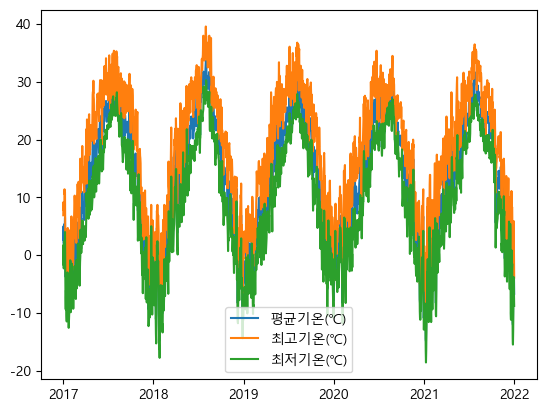

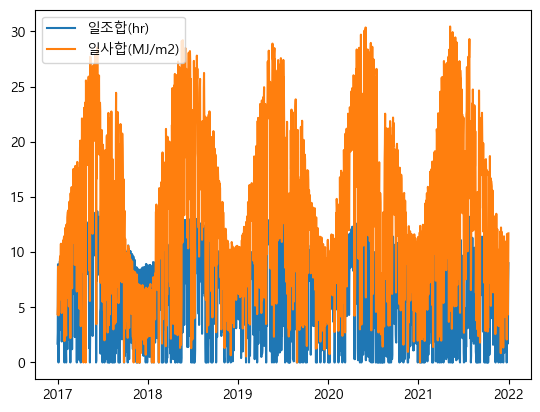

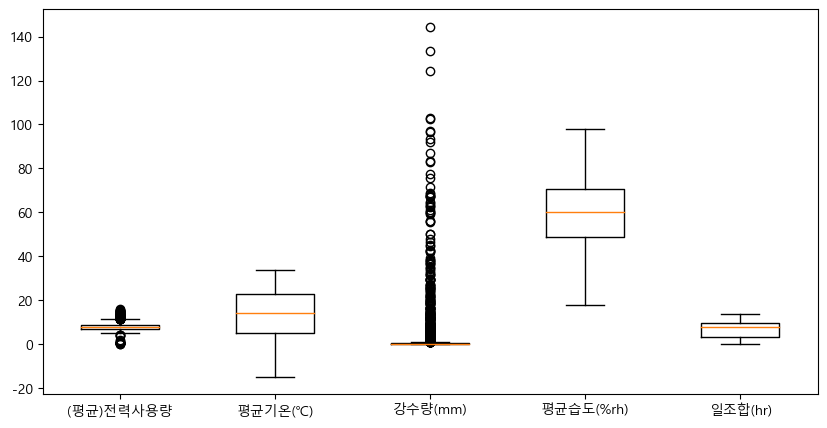

In [63]:
import matplotlib.pyplot as plt
plt.rc('font',family='malgun gothic')
plt.rcParams['axes.unicode_minus']=False

elec_cols = ['(평균)전력사용량', '(최대)전력사용량', '(중앙값)전력사용량']

plt.plot(df['일시'], df[elec_cols])
plt.legend(elec_cols)
plt.show()

temp_cols = ['평균기온(℃)','최고기온(℃)','최저기온(℃)']
plt.plot(df['일시'], df[temp_cols])
plt.legend(temp_cols)
plt.show()

sun_cols = ['일조합(hr)', '일사합(MJ/m2)']
plt.plot(df['일시'], df[sun_cols])
plt.legend(sun_cols)
plt.show()

'''
plt.plot(df['(평균)전력사용량'], df['평균기온(℃)'], label='평균기온(℃)')
plt.legend()
plt.show()
'''

plt.figure(figsize=(10,5))
labels=['(평균)전력사용량', '평균기온(℃)','강수량(mm)','평균습도(%rh)','일조합(hr)']
plt.boxplot([df['(평균)전력사용량'],df['평균기온(℃)'],df['강수량(mm)'],df['평균습도(%rh)'],df['일조합(hr)']])
plt.xticks(range(1, len(labels) + 1), labels)

plt.show()

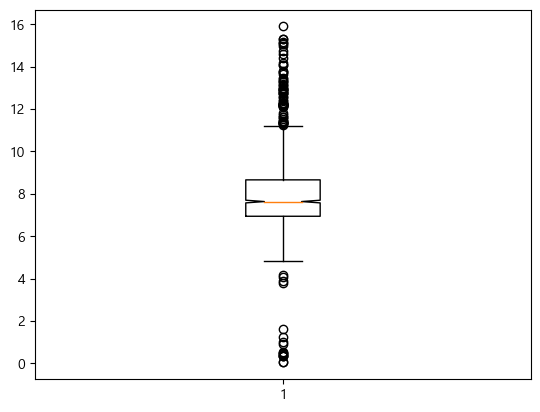

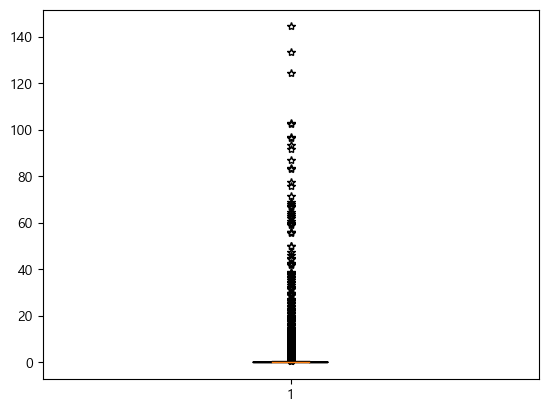

In [64]:
# (평균)전력사용량 이상치 확인
plt.boxplot(df['(평균)전력사용량'],sym='o',notch=1)
plt.show()

# 강수량(mm) 이상치 확인
plt.boxplot(df['강수량(mm)'],sym='*',notch=1)
plt.show()

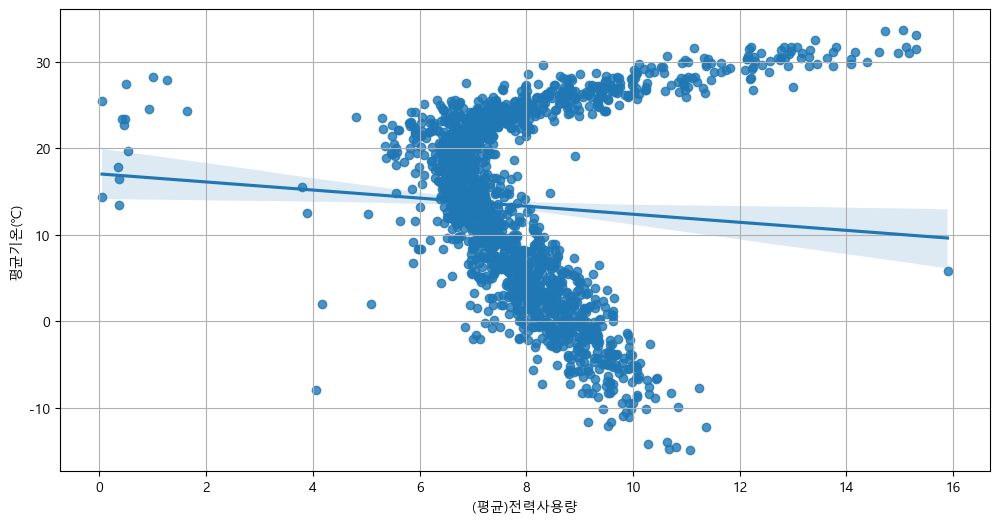

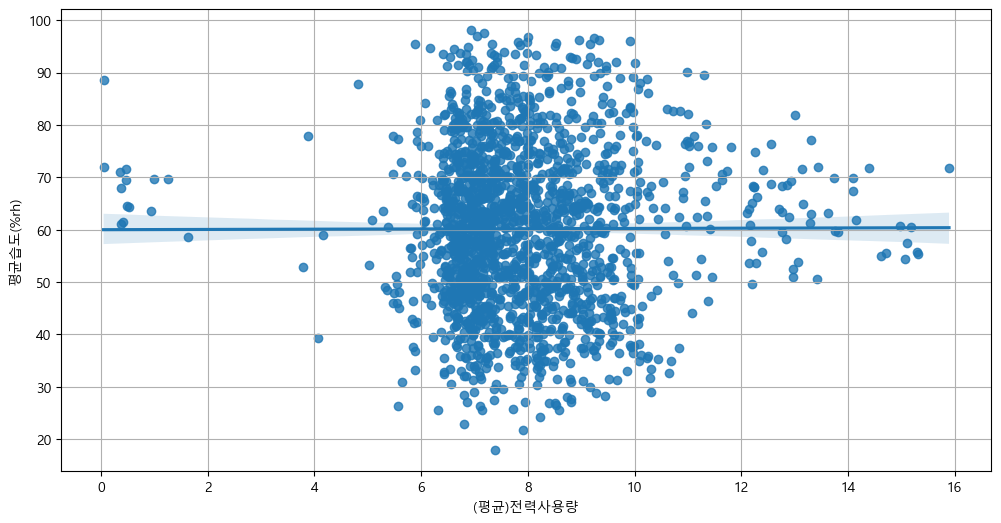

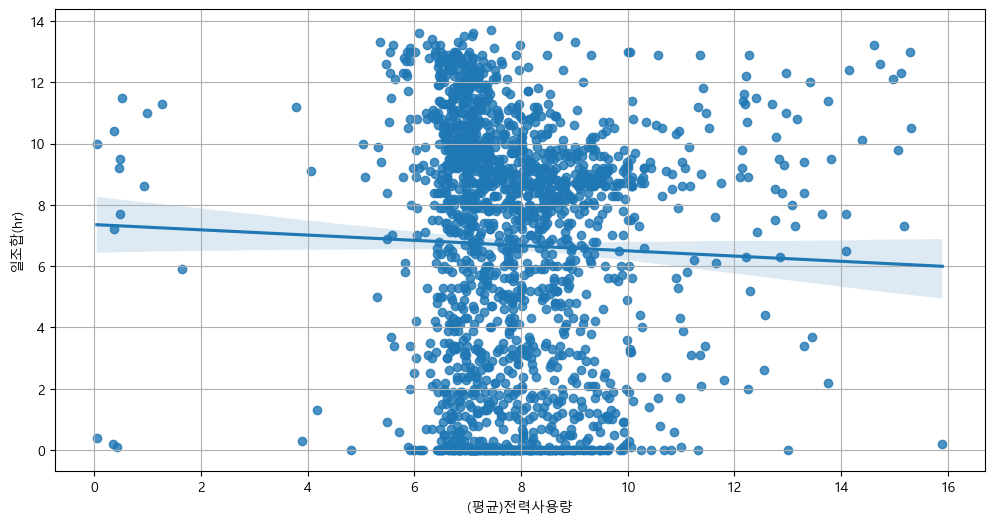

In [65]:
import seaborn as sns

# 단순선형회귀 그래프 ((평균)전력사용량 vs 평균기온)
plt.figure(figsize=(12,6))
sns.regplot(x='(평균)전력사용량',y='평균기온(℃)', data=df)
plt.grid()
plt.show()

# 단순선형회귀 그래프 ((평균)전력사용량 vs 평균습도)
plt.figure(figsize=(12,6))
sns.regplot(x='(평균)전력사용량',y='평균습도(%rh)', data=df)
plt.grid()
plt.show()

# 단순선형회귀 그래프 ((평균)전력사용량 vs 일조합)
plt.figure(figsize=(12,6))
sns.regplot(x='(평균)전력사용량',y='일조합(hr)', data=df)
plt.grid()
plt.show()


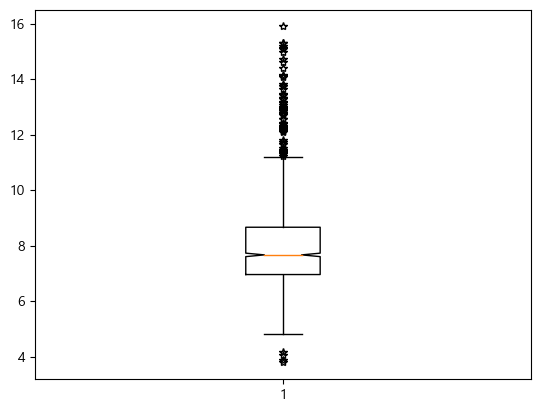

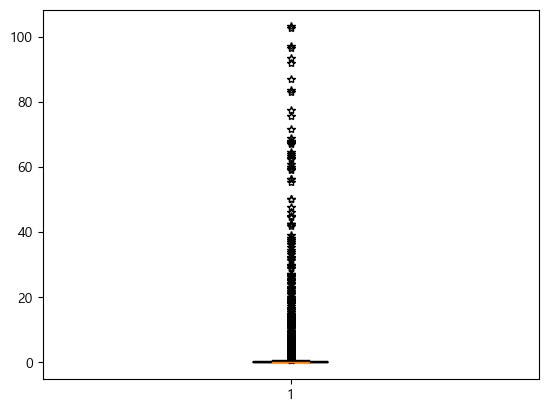

In [66]:
# 이상치 제거 - (평균)전력사용량
power_outliers = df[df['(평균)전력사용량'] <= 2]

mean_val = df['(평균)전력사용량'].mean()
df.loc[df['(평균)전력사용량'] <=2, '(평균)전력사용량'] = mean_val


# 이상치 제거 - 강수량(mm)
pre_outliers = df[df['강수량(mm)'] >= 120]

mean_value = df['강수량(mm)'].mean()
df.loc[df['강수량(mm)'] >= 120, '강수량(mm)'] = mean_value

# 2 이하부터 평균으로 대체된 (평균)전력사용량
plt.boxplot(df['(평균)전력사용량'],sym='*',notch=1)
plt.show()


# 120이상부터 평균으로 대체된 강수량(mm)
plt.boxplot(df['강수량(mm)'],sym='*',notch=1)
plt.show()

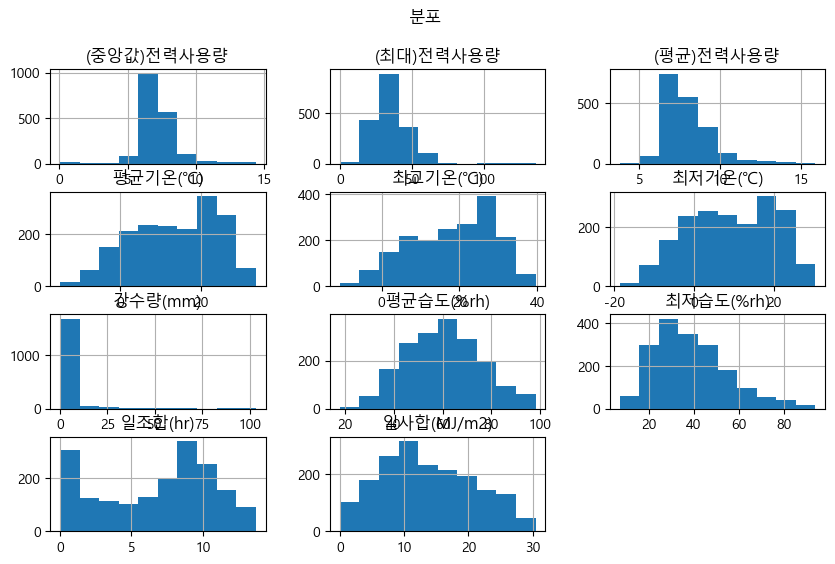

In [67]:
df.hist(bins=10, figsize=(10, 6))
plt.suptitle('분포')
plt.show()

In [68]:
# StandardScaler하기 전 날짜 칼럼인 '일시'를  인덱스로 지정하기
df.set_index('일시', inplace=True)
print(df)

            (중앙값)전력사용량  (최대)전력사용량  (평균)전력사용량  평균기온(℃)  최고기온(℃)  최저기온(℃)  \
일시                                                                        
2017-01-01      8.8430     31.174   9.648503      2.7      6.9     -1.6   
2017-01-02      6.4820     30.201   7.352475      5.0      9.2      1.8   
2017-01-03      4.3980     17.176   5.082431      2.0      7.7     -2.3   
2017-01-04      8.2000     35.117   9.081105      3.9      8.9      1.0   
2017-01-05      8.3250     36.038   9.285105      3.8      7.3     -0.1   
...                ...        ...        ...      ...      ...      ...   
2021-12-27      7.9150     52.136   9.307131     -7.6     -3.9    -12.9   
2021-12-28      7.5510     55.709   8.964990     -4.1     -0.9     -8.5   
2021-12-29      7.3605     50.721   8.788836      0.4      5.9     -3.8   
2021-12-30      7.4830     59.738   8.877535     -3.9      0.2     -6.8   
2021-12-31      7.9555     99.815   9.284918     -6.7     -3.9     -8.8   

            강수량(mm)  평균습

   (중앙값)전력사용량  (최대)전력사용량  (평균)전력사용량   평균기온(℃)   최고기온(℃)   최저기온(℃)   강수량(mm)  \
0    1.194132  -0.348759   1.129651 -1.008858 -1.065828 -1.004081 -0.286634   
1   -0.468588  -0.432188  -0.413517 -0.791303 -0.849585 -0.689069 -0.259862   
2   -1.936233  -1.548997  -1.939221 -1.075070 -0.990613 -1.068937 -0.286634   
3    0.741303  -0.010673   0.748301 -0.895351 -0.877791 -0.763189 -0.286634   
4    0.829333   0.068297   0.885410 -0.904810 -1.028220 -0.865105 -0.286634   

   평균습도(%rh)  최저습도(%rh)   일조합(hr)  일사합(MJ/m2)  
0   1.030195   1.220524 -1.240578   -1.293027  
1   1.154671   1.099025 -0.991390   -1.191187  
2   0.106451  -0.055211  0.553574   -0.716863  
3  -0.339043  -0.480457  0.478818   -0.693147  
4  -0.515930   0.187786 -1.664197   -1.308373  


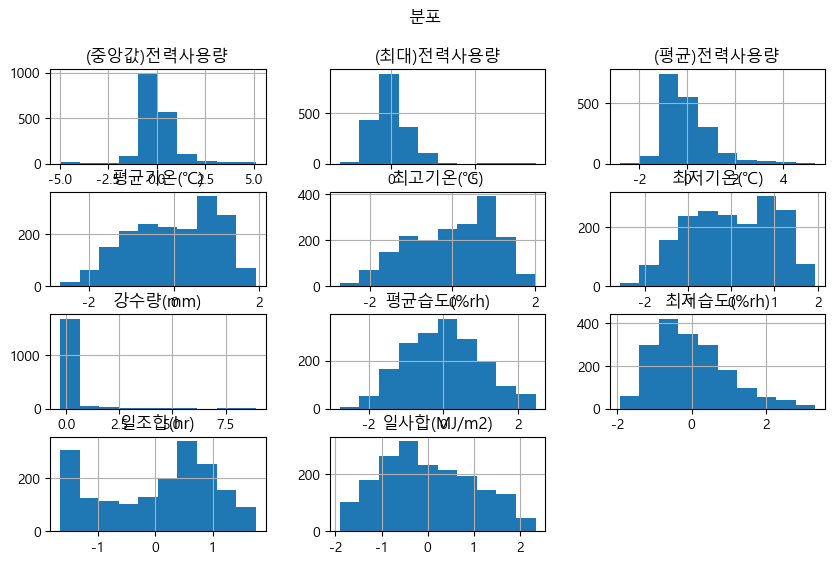

In [69]:
# 표준화
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
standardized_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
print(standardized_df.head())

standardized_df.hist(bins=10, figsize=(10, 6))
plt.suptitle('분포')
plt.show()

In [70]:
# 상관 행렬 계산
print(standardized_df.corr())

            (중앙값)전력사용량  (최대)전력사용량  (평균)전력사용량   평균기온(℃)   최고기온(℃)   최저기온(℃)  \
(중앙값)전력사용량    1.000000   0.578137   0.893937  0.007272 -0.017879  0.031165   
(최대)전력사용량     0.578137   1.000000   0.621280 -0.408721 -0.428311 -0.384363   
(평균)전력사용량     0.893937   0.621280   1.000000 -0.047289 -0.075269 -0.018860   
평균기온(℃)       0.007272  -0.408721  -0.047289  1.000000  0.989237  0.989532   
최고기온(℃)      -0.017879  -0.428311  -0.075269  0.989237  1.000000  0.962426   
최저기온(℃)       0.031165  -0.384363  -0.018860  0.989532  0.962426  1.000000   
강수량(mm)       0.028211  -0.051482   0.001555  0.165594  0.117096  0.205063   
평균습도(%rh)     0.036855  -0.113433   0.022829  0.428498  0.350770  0.494946   
최저습도(%rh)     0.100291  -0.046486   0.089972  0.413986  0.320535  0.489661   
일조합(hr)      -0.033185  -0.046727  -0.031927 -0.017091  0.082889 -0.105329   
일사합(MJ/m2)   -0.105208  -0.224189  -0.121740  0.404971  0.485451  0.323476   

             강수량(mm)  평균습도(%rh)  최저습도(%rh)   일조합(hr)  일사합(MJ/m2

In [71]:
# Feature : 최고기온(℃), 강수량(mm), 평균습도(%rh), 일사합(MJ/m2)
# Label : (최대)전력사용량
import  statsmodels.formula.api as smf

standardized_df = standardized_df.drop(columns = ['(최대)전력사용량', '(중앙값)전력사용량', '최고기온(℃)', '최저기온(℃)', '최저습도(%rh)', '일조합(hr)'])
standardized_df.columns = [col.replace('(평균)전력사용량', '전력사용량').replace('평균기온(℃)', '평균기온').replace('강수량(mm)', '강수량').replace('평균습도(%rh)', '평균습도').replace('일사합(MJ/m2)', '일사합') for col in standardized_df.columns]

column_select = "+".join(standardized_df.columns.difference(['전력사용량']))
lm_mul = smf.ols(formula = '평균기온 ~ ' + column_select, data=standardized_df).fit()

print('모델 정보 : ', lm_mul.summary())


모델 정보 :                              OLS Regression Results                            
Dep. Variable:                   평균기온   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.233e+33
Date:                Thu, 18 Jan 2024   Prob (F-statistic):               0.00
Time:                        18:17:26   Log-Likelihood:                 61795.
No. Observations:                1822   AIC:                        -1.236e+05
Df Residuals:                    1817   BIC:                        -1.236e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.635e-17   1.06e-17     -2.490

In [ ]:
# # Feature : 최고기온(℃), 강수량(mm), 평균습도(%rh), 일사합(MJ/m2)
# # Label : (최대)전력사용량
# import  statsmodels.formula.api as smf

# standardized_df = standardized_df.drop(columns = ['(최대)전력사용량', '(중앙값)전력사용량', '최고기온(℃)', '최저기온(℃)', '최저습도(%rh)', '일조합(hr)'])
# standardized_df.columns = [col.replace('(평균)전력사용량', '전력사용량').replace('최고기온(℃)', '최고기온'). replace('최저기온(℃)', '최저기온').replace('강수량(mm)', '강수량').replace('평균습도(%rh)', '평균습도').replace('일사합(MJ/m2)', '일사합') for col in standardized_df.columns]

# column_select = "+".join(standardized_df.columns.difference(['전력사용량']))
# lm_mul = smf.ols(formula = '평균기온 ~ ' + column_select, data=standardized_df).fit()

# print('모델 정보 : ', lm_mul.summary())

In [72]:
print(standardized_df.isnull().sum())


전력사용량    0
평균기온     0
강수량      0
평균습도     0
일사합      0
dtype: int64


In [78]:
# 다중공선성

independent_variables = standardized_df[['전력사용량','평균기온', '강수량', '평균습도', '일사합']]

# VIF 계산
vif_data = pd.DataFrame()
vif_data["Variable"] = independent_variables.columns
vif_data["VIF"] = [variance_inflation_factor(independent_variables.values, i) for i in range(independent_variables.shape[1])]

print(vif_data)

  Variable       VIF
0    전력사용량  1.017079
1     평균기온  2.176027
2      강수량  1.318226
3     평균습도  2.215436
4      일사합  2.102020


잔차항 :  0       2.138508
1       0.377786
2      -0.864151
3       1.643652
4       1.790220
          ...   
1817    2.883338
1818    2.322322
1819    1.778278
1820    2.244626
1821    2.783278
Length: 1822, dtype: float64
잔차항 합 :  4.156675004196586e-13


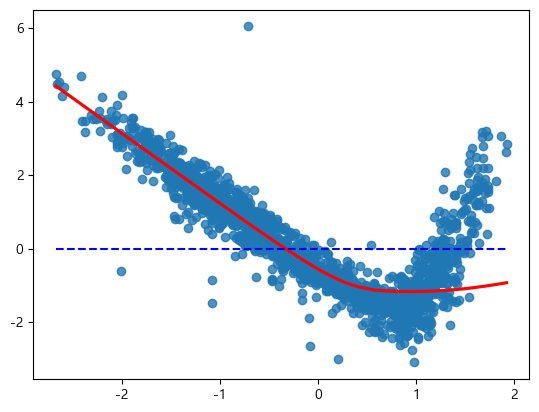

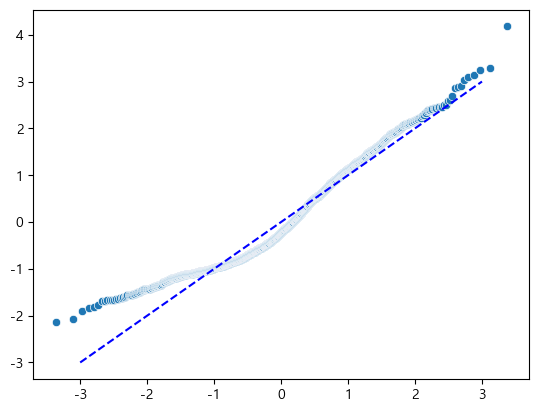

정규성 :  ShapiroResult(statistic=0.9501581192016602, pvalue=2.10743086424526e-24)
Durbin-Watson :  1.172


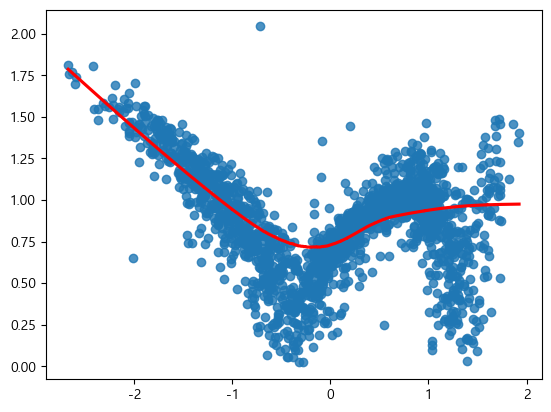

In [80]:
import scipy
import numpy as np
# 잔차항 도출
pred_df = standardized_df[list(standardized_df.columns.difference(['전력사용량']))]
fitted = lm_mul.predict(pred_df)
residual = standardized_df.전력사용량 - fitted
print('잔차항 : ', residual)
print('잔차항 합 : ', sum(residual)) # 2.460254222569347e-13 잔차의 합은 0에 가까움

# 선형성 검정
sns.regplot(x=fitted, y=residual, lowess=True, line_kws={'color':'red'}) # lowess=True:비모수적 최적모델 추정
plt.plot([fitted.min(), fitted.max()],[0,0], '--',color='blue')
plt.show()

# 정규성 검정
ssz = scipy.stats.zscore(residual)
(x,y), _ = scipy.stats.probplot(ssz)
sns.scatterplot(x=x, y=y)
plt.plot([-3,3],[-3,3], '--', color='blue')
plt.show() # 추세선 아래쪽에 존재하는 데이터가 일부 존재하나 추세선을 따라가는 것으로 보임
print('정규성 : ', scipy.stats.shapiro(residual))

# 독립성 검정
print('Durbin-Watson : ', 1.441)

# 등분산성 검정
sns.regplot(x=fitted, y=np.sqrt(np.abs(ssz)), lowess=True, line_kws= {'color':'red'})
plt.show()

In [86]:
# 데이터셋 분리, LinearRegression   standardized_df[['전력사용량','평균기온', '강수량', '평균습도', '일사합']]
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X=standardized_df[['평균기온','강수량','평균습도','일사합']]
Y=standardized_df['전력사용량']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=12)
# 다중 회귀 모델 생성 및 학습
model = LinearRegression()
model.fit(X_train, Y_train)

# 테스트 데이터를 사용하여 예측
Y_pred = model.predict(X_test)

# R-squared 계산
r2 = r2_score(Y_test, Y_pred)
print("LinearRegression_R-squared:", r2)

LinearRegression_R-squared: -0.0029479973739956478


In [91]:
# 데이터셋 분리, Decision Tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

X=standardized_df[['평균기온','강수량','평균습도','일사합']]
Y=standardized_df['전력사용량']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=12)
# 다중 회귀 모델 생성 및 학습
model = DecisionTreeRegressor()
model.fit(X_train, Y_train)

# 테스트 데이터를 사용하여 예측
Y_pred = model.predict(X_test)

# R-squared 계산
r2 = r2_score(Y_test, Y_pred)
print("DecisionTreeRegressor_R-squared:", r2)

DecisionTreeRegressor_R-squared: 0.7306912483851558


In [93]:
# 데이터셋 분리, Random Forest
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

X=standardized_df[['평균기온','강수량','평균습도','일사합']]
Y=standardized_df['전력사용량']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=12)
# 다중 회귀 모델 생성 및 학습
model = RandomForestRegressor()

# 교차 검증을 통한 성능 평가
scores = cross_val_score(model, X_train, Y_train, cv=5, scoring='r2')
print("Cross-validated R-squared:", np.mean(scores))

model.fit(X_train, Y_train)

# 테스트 데이터를 사용하여 예측
Y_pred = model.predict(X_test)

# R-squared 계산
r2 = r2_score(Y_test, Y_pred)
print("RandomForestRegressor_R-squared:", r2)

Cross-validated R-squared: 0.7443954182711094
RandomForestRegressor_R-squared: 0.8067938816292344


In [88]:
# 데이터셋 분리, SVM
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import r2_score

X=standardized_df[['평균기온','강수량','평균습도','일사합']]
Y=standardized_df['전력사용량']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=12)
# 다중 회귀 모델 생성 및 학습
model = SVR()
model.fit(X_train, Y_train)

# 테스트 데이터를 사용하여 예측
Y_pred = model.predict(X_test)

# R-squared 계산
r2 = r2_score(Y_test, Y_pred)
print("SVM_R-squared:", r2)

SVM_R-squared: 0.7408669028315198


In [89]:
# 데이터셋 분리, KNN
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

X=standardized_df[['평균기온','강수량','평균습도','일사합']]
Y=standardized_df['전력사용량']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=12)
# 다중 회귀 모델 생성 및 학습
model = KNeighborsRegressor()
model.fit(X_train, Y_train)

# 테스트 데이터를 사용하여 예측
Y_pred = model.predict(X_test)

# R-squared 계산
r2 = r2_score(Y_test, Y_pred)
print("KNeighborsRegressor_R-squared:", r2)

KNeighborsRegressor_R-squared: 0.650257039440882


In [90]:
# 데이터셋 분리, Neural Network
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score

X=standardized_df[['평균기온','강수량','평균습도','일사합']]
Y=standardized_df['전력사용량']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=12)
# 다중 회귀 모델 생성 및 학습
model = MLPRegressor()
model.fit(X_train, Y_train)

# 테스트 데이터를 사용하여 예측
Y_pred = model.predict(X_test)

# R-squared 계산
r2 = r2_score(Y_test, Y_pred)
print("MLPRegressor_R-squared:", r2)

MLPRegressor_R-squared: 0.8199308309167914
